# Clustering Genomic Data



In [97]:
import pandas as pd
from tqdm import tqdm

from sklearn.decomposition import PCA

In [33]:
with open('data/ccrescentus.fa') as file:
    data = file.readlines()
    cleanarray = [string.replace('\n', '') for string in data[1:]]
    cleanstring = ''.join(cleanarray)

In [95]:
import re
arrays = re.findall('.{300}', cleanstring)
arrays

tbls = []
for wordlen in range(1, 5):
    counts = []
    for array in tqdm(arrays):
        worddict = {}
        for word in re.findall(''.join(['.{', str(wordlen), '}']), array):
            worddict[word] = worddict.get(word, 0) + 1
        counts.append(worddict)
    tbls.append(pd.DataFrame(counts))

100%|████████████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:00<00:00, 7068.66it/s]


In [98]:
components = PCA(n_components=2)
components.fit(tbls[0])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA Words of length: 0


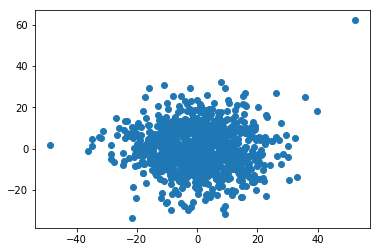

PCA Words of length: 1


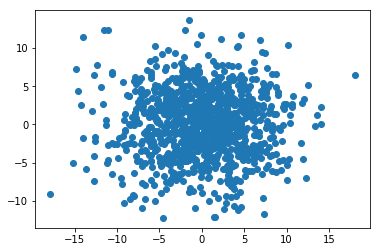

PCA Words of length: 2


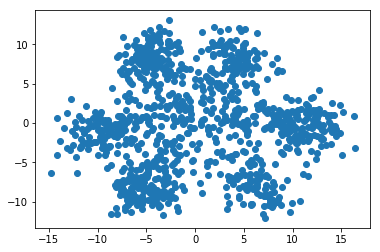

PCA Words of length: 3


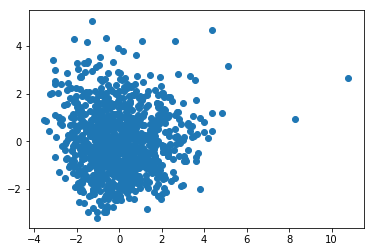

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(4):
    print(f"PCA Words of length: {i}")
    t = tbls[i].fillna(0)
    components = PCA(n_components=2)
    components.fit(t)
    df = pd.DataFrame(components.transform(t))
    plt.scatter(df[0], df[1])
    plt.show()